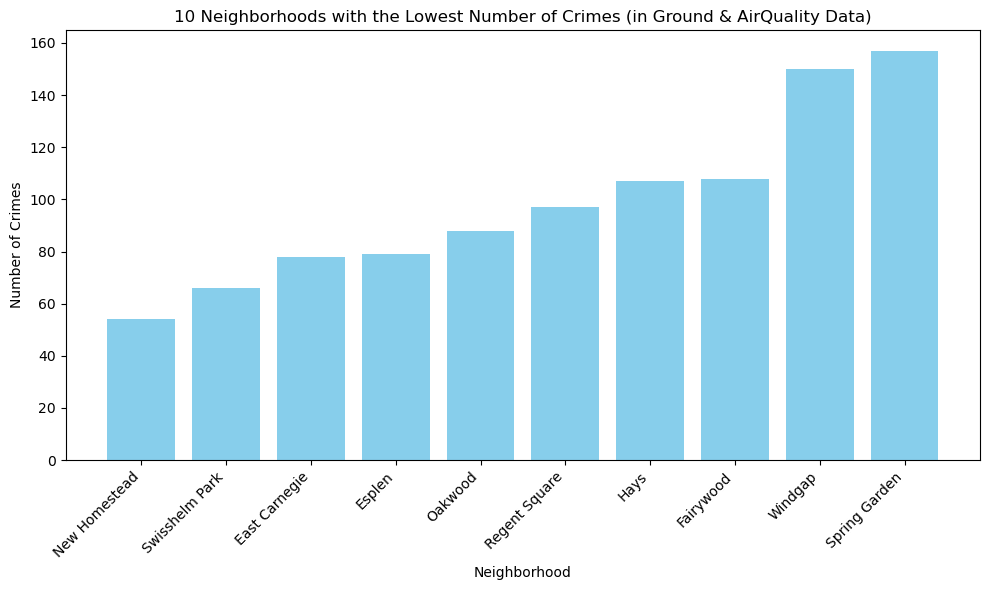

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load CSVs
crime = pd.read_csv("crime.csv", low_memory=False)
ground = pd.read_csv("ground.csv", low_memory=False)
air = pd.read_csv("AirQuality.csv", low_memory=False)

# Combine all neighborhood names from ground + air datasets
ground_neighborhoods = set(ground["neighborhood"].dropna().unique())
air_neighborhoods = set(air["site"].dropna().unique())

# Merge the two sets (include any that appear in either dataset)
target_neighborhoods = ground_neighborhoods.union(air_neighborhoods)

# Filter crime data to only those neighborhoods
filtered_crimes = crime[crime["Neighborhood"].isin(target_neighborhoods)]

# Count crimes per neighborhood
numCrimes_filtered = (
    filtered_crimes["Neighborhood"]
    .value_counts()
    .reset_index()
    .rename(columns={"index": "Neighborhood", "Neighborhood": "CrimeCount"})
)

# Fix column rename correctly (the above line overwrote itself)
numCrimes_filtered.columns = ["Neighborhood", "CrimeCount"]

# Sort to find 10 lowest-crime neighborhoods
lowest10 = numCrimes_filtered.sort_values(by="CrimeCount", ascending=True).head(10)

# --- Plot ---
plt.figure(figsize=(10, 6))
plt.bar(lowest10["Neighborhood"], lowest10["CrimeCount"], color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.title("10 Neighborhoods with the Lowest Number of Crimes (in Ground & AirQuality Data)")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Crimes")
plt.tight_layout()
plt.show()